In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1]:
'''
1. Data Understanding
2. Data Preprocessing
3. Model Building
4. Model Evaluation
5. Model Deployment
'''

'\n1. Data Understanding\n2. Data Preprocessing\n3. Model Building\n4. Model Evaluation\n5. Model Deployment\n'

In [6]:
df=pd.read_csv(r'C:\Users\devan\OneDrive\Desktop\ML\placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [11]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Text(0.5, 0, 'cgpa')

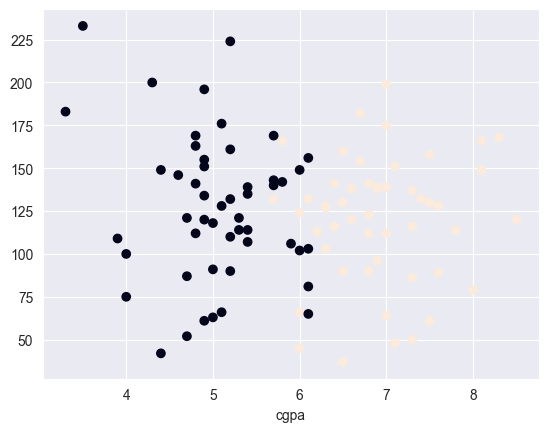

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa')

In [18]:
'''extracting independent and dependent features'''
x=df.drop('placement',axis=1)
y=df['placement']

In [19]:
print(x)
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [24]:
len(y_train)

80

In [25]:
len(y_test)

20

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
'''
✅ fit()
Learns from the data.

It calculates and stores internal parameters/statistics (e.g., mean and std for StandardScaler, min and max for MinMaxScaler, etc.).

No transformation is applied to the data at this point.


✅ transform()
Uses the learned parameters from .fit() to transform new data.

It does not learn anything new, only applies what was learned.

✅ fit_transform()
Combines both fit() and transform() in one step.

It is used only on training data (where learning and transformation are done together).

'''

In [28]:
x_train

array([[ 0.68722958,  0.51773529],
       [-0.01313178, -0.48995909],
       [ 1.21250059,  0.28519043],
       [ 0.07441339,  0.28519043],
       [-0.01313178, -1.42013852],
       [ 0.51213924,  0.44022033],
       [-0.27576728,  0.56941192],
       [ 0.16195856, -0.2057376 ],
       [ 0.42459407, -2.16944973],
       [-0.97612864,  0.87947173],
       [ 0.77477475,  0.46605865],
       [-0.97612864,  1.93884275],
       [ 1.12495542, -0.90337217],
       [-1.76403516, -1.18759367],
       [-1.06367381,  0.51773529],
       [-0.01313178,  0.07848389],
       [-1.76403516, -0.54163573],
       [ 0.07441339, -1.44597684],
       [ 0.24950373,  0.18183716],
       [ 0.59968441,  0.85363341],
       [-0.10067694, -0.38660582],
       [ 1.12495542,  0.41438202],
       [ 1.38759093, -0.82585722],
       [-0.53840279, -0.17989929],
       [-0.18822211,  0.5435736 ],
       [-0.8010383 ,  1.4220764 ],
       [-2.37685134,  1.60294462],
       [-0.97612864,  0.33686706],
       [ 0.42459407,

In [30]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=log.predict(x_test)
print(y_pred)

[1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1]


In [33]:
# checking the accuracy using y_test
y_test

26    1
86    0
2     0
55    1
75    0
93    1
16    0
73    0
54    1
95    0
53    1
92    0
78    0
13    1
7     0
30    1
22    0
24    0
33    0
8     0
Name: placement, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

In [36]:
#plotting the decision boundary
from mlxtend.plotting import plot_decision_regions


<Axes: >

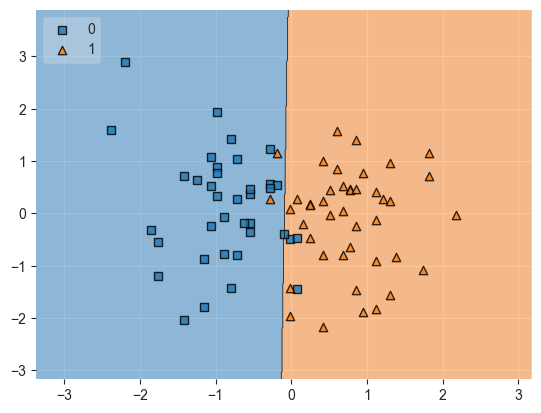

In [37]:

# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=log,legend=2)


In [ ]:
'''
 so all in all in simple terms this code is depicting the visual representation of the model trainging part like how the model got trained in the process and what were the points that were missclassified?
 '''

In [38]:
# saving the model
import pickle
pickle.dump(log,open('model.pkl','wb'))

In [ ]:
'''
important note
# ❌ Wrong: fitting on test data (leaks info)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = scaler.fit_transform(X_train)
# ✅ fit + transform on train
X_test_scaled = scaler.transform(X_test)
# ✅ only transform on test


First split the data then do scaling.
If you do scaling first it will give the some information (variance) of your test set into a train set.
Its like you are training your whole data set and then applying it to only selected portion of your data. Which is meaning less.


'''